In [ ]:
!pip3 install tslearn

from tslearn.metrics import dtw
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
a = [1,2,3,4,5]
i = [0,2,4]
[a[x] for x in i]

[1, 3, 5]

In [ ]:
# Assume that X is a numpy array containing your time series data
X = np.array([25*[-1], 
    
              [1, .2, 1, .1, 1, .1, .1, 1, 3, 1, 1, 1, 1, 1, 1, 1, .2, .1, .1, .1, 1, 1, 1, 1, 1], 
              [1, .1, 1, .1, 1, .2, .1, 1, 2, 3, 1, 1, 1, 1, 1, 1, .1, .2, .1, .1, 1, 1, 1, 1, 1],
              [1, .1, 1, 0., 1, .1, .1, 1, 2, 4, 1, 1, 1, 1, 1, 1, .1, .1, .2, .1, 1, 1, 1, 1, 1],
              [1, .1, 1, .1, 1, .3, .1, 1, 2, 3, 3, 1, 1, 1, 1, 1, .1, .1, .1, .1, 1, 1, 1, 1, 1],
              [1, .1, 1, .1, 1, .1, 0., 1, 2, 2, 2, 1, 1, 1, 1, 1, .1, .1, .1, .3, 1, 1, 1, 1, 1],

              [7.6, 7, 7, 7, 7, 7.6, 7.8, 7, 7, 7, 7, 7.5, 7, 7.3, 7, 7, 7, 7, 7, 7.0, 7, 7, 7, 7, 7],
              [7.0, 7, 7, 7, 7, 7.0, 8.0, 7, 7, 7, 7, 7.1, 7, 6.9, 7, 7, 7, 7, 7, 7.2, 7, 7, 7, 7, 7],
              [7.5, 7, 7, 7, 7, 6.9, 7.7, 7, 7, 7, 7, 7.3, 7, 6.9, 7, 7, 7, 7, 7, 7.0, 7, 7, 7, 7, 7],
              [7.0, 7, 7, 7, 7, 6.7, 7.7, 7, 7, 7, 7, 7.6, 7, 6.7, 7, 7, 7, 7, 7, 7.1, 7, 7, 7, 7, 7],
              [10, 7, 7, 7, 7, 6.7, 7.7, 7, 7, 7, 7, 7.6, 7, 6.7, 7, 7, 7, 7, 7, 7.1, 7, 7, 7, 7, 7]])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# Define the distance metric to be DTW distance
def dtw_distance(X, Y=None, **kwargs):
    if Y is None:
        return 0.0
    else:
        return dtw(X, Y)

# Define the DBSCAN model using DTW distance as the metric
dtw_eps = 3 # VERY INTERESTING: should adjust to length of time series
dbscan = DBSCAN(metric=dtw_distance, eps=dtw_eps, min_samples=5)

# Fit the DBSCAN model to the data
dtw_labels = dbscan.fit_predict(X)

# Evaluate the quality of the clustering
labels = dtw_labels
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Estimated number of clusters: %d" % n_clusters)
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))


Estimated number of clusters: 2


In [ ]:
labels

array([-1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1])

In [ ]:
dtw_distance(X[-1], X[-2])

3.0

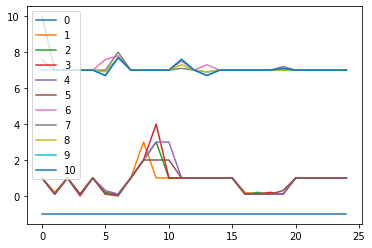

In [ ]:
for idx, x in enumerate(X):
    plt.plot(x, label=idx)
plt.legend()

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from tslearn.metrics import dtw

# Assume that X is a numpy array of shape (183, 64, 2) containing your time series data
X =           [[[1, 1], [2, 2], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1]], 
               [[1, 1], [2, 2], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1]],
               [[1, 1], [2, 2], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1]],
               [[1, 1], [2, 2], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1]],
               [[1, 1], [2, 2], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1]],
               [[1, 7], [2, 7], [3, 7], [4, 7], [5, 7], [6, 7], [7, 7], [8, 7]],
               [[1, 7], [2, 7], [3, 7], [4, 7], [5, 7], [6, 7], [7, 7], [8, 7]],
               [[1, 7], [2, 7], [3, 7], [4, 7], [5, 7], [6, 7], [7, 7], [8, 7]],
               [[1, 7], [2, 7], [3, 7], [4, 7], [5, 7], [6, 7], [7, 7], [8, 7]],
               [[1, 7], [2, 7], [3, 7], [4, 7], [5, 7], [6, 7], [7, 7], [8, 7]],]
X = np.array(X)
# Define a custom distance metric function using the DTW distance from tslearn
def dtw_distance(X, Y):
    return dtw(X, Y)

# Define the pairwise distance metric using the custom DTW distance function
dists = pairwise_distances(X.reshape(X.shape[0], -1), metric=dtw_distance)

# Define the DBSCAN model with appropriate parameters
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='precomputed')

# Fit the DBSCAN model to the pairwise distances
dbscan.fit(dists)

# Print the number of clusters and the cluster labels
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"Number of clusters: {n_clusters}")
print(f"Cluster labels: {dbscan.labels_}")


Number of clusters: 2
Cluster labels: [0 0 0 0 0 1 1 1 1 1]


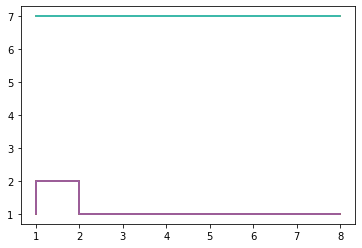

In [ ]:
for ts in X:
    x, y = list(zip(*ts))
    plt.step(x, y)


In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from tslearn.metrics import soft_dtw

# Assume that X is a numpy array of shape (183, 64, 2) containing your time series data
X =           [[[1, 1], [2, 2], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1]], 
               [[1, 1], [2, 2], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1]],
               [[1, 1], [2, 2], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1]],
               [[1, 1], [2, 2], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1]],
               [[1, 1], [2, 2], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1]],
               [[1, 7], [2, 7], [3, 7], [4, 7], [5, 7], [6, 7], [7, 7], [8, 7]],
               [[1, 7], [2, 7], [3, 7], [4, 7], [5, 7], [6, 7], [7, 7], [8, 7]],
               [[1, 7], [2, 7], [3, 7], [4, 7], [5, 7], [6, 7], [7, 7], [8, 7]],
               [[1, 7], [2, 7], [3, 7], [4, 7], [5, 7], [6, 7], [7, 7], [8, 7]],
               [[1, 7], [2, 7], [3, 7], [4, 7], [5, 7], [6, 7], [7, 7], [8, 7]],]
X = np.array(X)
# Define a custom distance metric function using the DTW distance from tslearn
def soft_dtw_distance(X, Y, gamma):
    return soft_dtw(X, Y, gamma=gamma)

# Define the pairwise distance metric using the custom DTW distance function
dists = pairwise_distances(X.reshape(X.shape[0], -1), metric=soft_dtw_distance, gamma = 1.0)

# Define the DBSCAN model with appropriate parameters
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='precomputed')

# Fit the DBSCAN model to the pairwise distances
dbscan.fit(dists)

# Print the number of clusters and the cluster labels
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"Number of clusters: {n_clusters}")
print(f"Cluster labels: {dbscan.labels_}")



ValueError: ignored

In [ ]:
for ts in X:
    x, y = list(zip(*ts))
    plt.step(x, y)